In [1]:
import pandas as pd

In [2]:
rad_file = r'C:\Users\sayala\Desktop\JAMES\Rad.csv'
vf_file = r'C:\Users\sayala\Desktop\JAMES\VF.csv'

In [3]:
df1 = pd.read_csv(rad_file)
df2 = pd.read_csv(vf_file)


In [4]:
df1 = df1.rename(columns={'1': '1.0', '2': '2.0'})

In [5]:
df1 = df1.add_prefix('rad_')
#df2 = df2.add_prefix('vf_')

In [6]:
from bifacial_radiance.performance import MBD, RMSE, MBD_abs, RMSE_abs

In [7]:
from scipy.interpolate import interp1d

ch = ['0.25', '0.5', '0.75', '1.0', '1.5', '2.0']

for c in ch:
    print
    f2 = interp1d(df2['y'],df2[c],bounds_error=False)
    df1['vf_'+c] = f2(df1.rad_y)

In [8]:
res = df1.dropna()

In [9]:
res

,rad_y,rad_0.25,rad_0.5,rad_0.75,rad_1.0,rad_1.5,rad_2.0,vf_0.25,vf_0.5,vf_0.75,vf_1.0,vf_1.5,vf_2.0
0,0.123386,136708.90,151939.60,159652.60,160485.80,161745.9,170643.5,8179.240197,13515.962437,18570.165346,59833.525923,133359.010895,151689.758852
1,0.153841,18982.75,56553.31,88257.49,113284.60,138377.8,159876.1,7767.739456,13539.989027,18208.253748,38669.148259,111803.076942,135287.477908
2,0.184296,18251.30,54352.41,84874.01,108912.40,133376.6,154761.7,7382.333162,13570.569325,17849.294861,19206.850153,89067.978483,119559.951478
3,0.214752,17519.14,52150.39,81490.10,104538.50,128373.7,149645.6,7291.496848,13675.136595,17523.656275,18958.871094,53020.266036,111449.250579
4,0.245207,14040.39,21924.98,36418.56,61717.52,102961.1,129215.0,7200.248454,13785.135980,17200.494813,18712.884985,20255.154661,100580.024499
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,5.848983,249644.20,223018.20,216164.20,214261.80,212617.3,215070.5,238850.980497,221411.953175,221122.840308,217061.356943,202923.976316,195272.118352
189,5.879439,249664.80,221340.30,214392.80,213101.70,211518.8,212778.4,237910.971420,220214.061863,220974.218227,209977.162016,195927.228319,193834.599768
190,5.909894,249685.50,219662.30,214462.50,211941.50,210420.2,210486.4,227876.767133,219765.805939,209108.395517,201902.965950,194695.408300,193738.374380
191,5.940349,249706.10,217984.30,212869.20,210781.40,209321.7,208194.3,217744.328188,218846.187813,197525.314330,194064.825790,193497.194124,193642.176776


In [10]:
ch = ['0.25', '0.5', '0.75', '1.0', '1.5', '2.0']

#MBD, RMSE, MBD_abs, RMSE_abs

print('MBD,  RMSE,  MBD_abs, RMSE_abs')
for cs in ch:
    print(round(MBD(res['rad_'+cs], res['vf_'+cs]),1) ,
          round(RMSE(res['rad_'+cs], res['vf_'+cs]),1) , 
          round(MBD_abs(res['rad_'+cs], res['vf_'+cs]),1) ,
          round(RMSE_abs(res['rad_'+cs], res['vf_'+cs]),1))

MBD,  RMSE,  MBD_abs, RMSE_abs
2.2 11.2 4047.0 20655.4
2.4 9.6 4944.5 19847.3
2.1 8.5 4178.2 17024.0
1.6 9.1 3128.2 17914.7
1.3 8.5 2427.4 16208.2
2.1 8.2 4272.1 16571.5


In [11]:
import matplotlib.pyplot as plt

Text(0, 0.5, ' View Factor ')

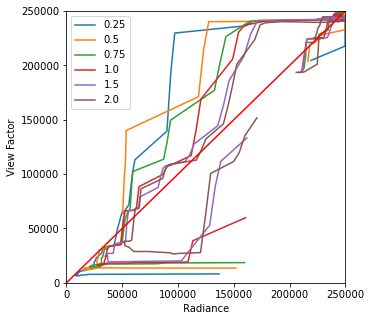

In [13]:
plt.rcParams["figure.figsize"] = (5,5)

for cs in ch:
    plt.plot(res['rad_'+cs], res['vf_'+cs], label=cs)
plt.plot([0,250000], [0,250000], 'r')
plt.legend()
plt.xlim([0,250000])
plt.ylim([0,250000])
plt.xlabel(' Radiance ')
plt.ylabel(' View Factor ')